In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv('data/교육부.csv')
print(df.shape)
print(df)


(26, 5)
       구분 성별  키(cm)  몸무게(kg)  검사인원수
0    만 6세  남  120.5     24.2   1818
1    만 6세  여  119.3     22.9   1649
2    만 7세  남  125.7     27.1   2896
3    만 7세  여  124.5     25.7   2721
4    만 8세  남  131.8     31.4   2959
5    만 8세  여  130.2     29.0   2801
6    만 9세  남  137.4     35.6   2779
7    만 9세  여  136.6     33.1   2602
8   만 10세  남  142.7     40.3   2844
9   만 10세  여  143.1     38.0   2644
10  만 11세  남  149.2     45.9   2919
11  만 11세  여  150.1     43.6   2735
12  만 12세  남  157.2     52.0   3456
13  만 12세  여  155.3     48.4   3189
14  만 13세  남  164.0     57.6   3948
15  만 13세  여  158.4     52.0   3651
16   만14세  남  168.9     62.4   4004
17   만14세  여  159.7     53.9   3920
18  만 15세  남  171.6     65.4   4525
19  만 15세  여  160.3     55.6   4363
20  만 16세  남  172.8     68.1   4531
21  만 16세  여  160.6     56.8   4587
22  만 17세  남  173.5     69.6   4247
23  만 17세  여  160.8     57.1   4480
24  만 18세  남  173.5     70.0   1296
25  만 18세  여  160.7     56.6   1267


In [4]:
df.describe()

,키(cm),몸무게(kg),검사인원수
count,26.000000,26.000000,26.000000
mean,150.323077,47.011538,3185.807692
std,17.380663,14.988431,1000.170906
min,119.300000,22.900000,1267.000000
25%,136.800000,33.725000,2724.500000
50%,156.250000,50.200000,2939.000000
75%,160.775000,57.025000,3990.000000
max,173.500000,70.000000,4587.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   구분       26 non-null     object 
 1   성별       26 non-null     object 
 2   키(cm)    26 non-null     float64
 3   몸무게(kg)  26 non-null     float64
 4   검사인원수    26 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
# 결측치 확인
df.isnull().sum() 

구분         0
성별         0
키(cm)      0
몸무게(kg)    0
검사인원수      0
dtype: int64

In [17]:
data = df.loc[:, ['구분','성별','키(cm)','몸무게(kg)']]
data.head()

,구분,성별,키(cm),몸무게(kg)
0,만 6세,남,120.5,24.2
1,만 6세,여,119.3,22.9
2,만 7세,남,125.7,27.1
3,만 7세,여,124.5,25.7
4,만 8세,남,131.8,31.4


In [18]:
data.rename(columns={'키(cm)':'키', '몸무게(kg)':'몸무게'}, inplace=True)
data.head()

,구분,성별,키,몸무게
0,만 6세,남,120.5,24.2
1,만 6세,여,119.3,22.9
2,만 7세,남,125.7,27.1
3,만 7세,여,124.5,25.7
4,만 8세,남,131.8,31.4


In [19]:
#BMI 항목 추가
data['BMI'] = data['몸무게'] / (data['키'] / 100) ** 2
data.head()

,구분,성별,키,몸무게,BMI
0,만 6세,남,120.5,24.2,16.666380
1,만 6세,여,119.3,22.9,16.089946
2,만 7세,남,125.7,27.1,17.151367
3,만 7세,여,124.5,25.7,16.580378
4,만 8세,남,131.8,31.4,18.075854


In [20]:
# 남자 데이터 분리하기 
mask_male = (data.성별 == '남')
df_male = data.loc[mask_male, :]
print(df_male.shape)
df_male.head()

(13, 5)


,구분,성별,키,몸무게,BMI
0,만 6세,남,120.5,24.2,16.666380
2,만 7세,남,125.7,27.1,17.151367
4,만 8세,남,131.8,31.4,18.075854
6,만 9세,남,137.4,35.6,18.857171
8,만 10세,남,142.7,40.3,19.790515


In [21]:
# 여자 데이터 분리하기 
mask_female = (data.성별 == '여')
df_female = data.loc[mask_female, :]
print(df_female.shape)
df_female.head()

(13, 5)


,구분,성별,키,몸무게,BMI
1,만 6세,여,119.3,22.9,16.089946
3,만 7세,여,124.5,25.7,16.580378
5,만 8세,여,130.2,29.0,17.107086
7,만 9세,여,136.6,33.1,17.738896
9,만 10세,여,143.1,38.0,18.556853


In [22]:
# 남녀 숫자 계산하기 
gender_count = data['성별'].value_counts()
gender_count

남    13
여    13
Name: 성별, dtype: int64

In [24]:
# 한글 처리 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

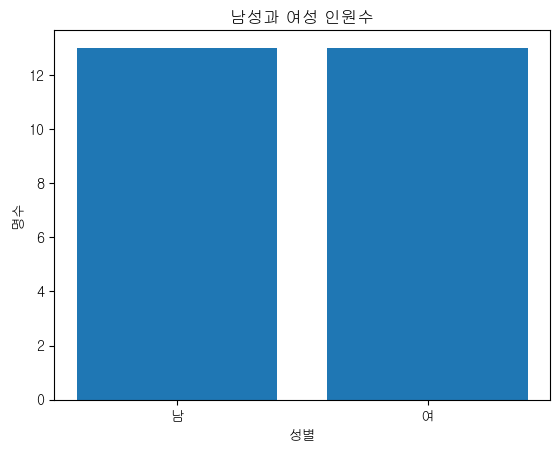

In [25]:
plt.bar(gender_count.index, gender_count.values)
plt.title("남성과 여성 인원수")
plt.xlabel("성별")
plt.ylabel("명수")
plt.show()

In [27]:
# 판단 함수 
def determination(bmi):
    if bmi < 18.5:
        decision = '저체중'
    elif bmi < 23:
        decision = '정상'
    elif bmi < 25:
        decision = '과체중'
    else:
        decision = '비만'
    return decision

전체에 대해 분석하기

In [30]:
# 판단 함수 적용
data['Result'] = data['BMI'].apply(determination)
data.head()

,구분,성별,키,몸무게,BMI,Result
0,만 6세,남,120.5,24.2,16.666380,저체중
1,만 6세,여,119.3,22.9,16.089946,저체중
2,만 7세,남,125.7,27.1,17.151367,저체중
3,만 7세,여,124.5,25.7,16.580378,저체중
4,만 8세,남,131.8,31.4,18.075854,저체중


In [31]:
value_count = data['Result'].value_counts()
value_count

정상     17
저체중     7
과체중     2
Name: Result, dtype: int64

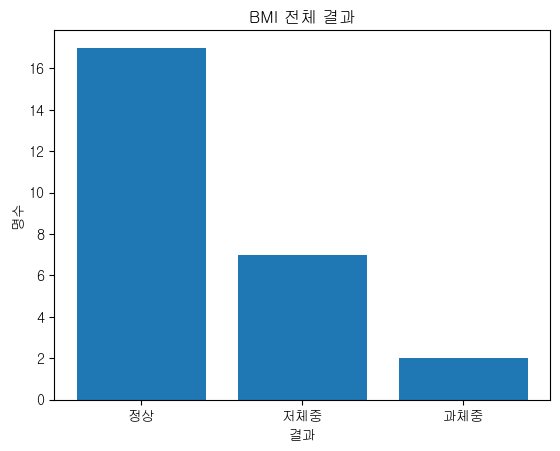

In [32]:
plt.bar(value_count.index, value_count.values)
plt.title("BMI 전체 결과")
plt.xlabel("결과")
plt.ylabel("명수")
plt.show()

남학생에 대해 분석하기

In [33]:
df_male['Result'] = df_male['BMI'].apply(determination)
df_male.head()

C:\Users\UserK\AppData\Local\Temp\ipykernel_13124\1293725952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['Result'] = df_male['BMI'].apply(determination)


,구분,성별,키,몸무게,BMI,Result
0,만 6세,남,120.5,24.2,16.666380,저체중
2,만 7세,남,125.7,27.1,17.151367,저체중
4,만 8세,남,131.8,31.4,18.075854,저체중
6,만 9세,남,137.4,35.6,18.857171,정상
8,만 10세,남,142.7,40.3,19.790515,정상


In [34]:
value_count = df_male['Result'].value_counts()
value_count

정상     8
저체중    3
과체중    2
Name: Result, dtype: int64

<AxesSubplot: >

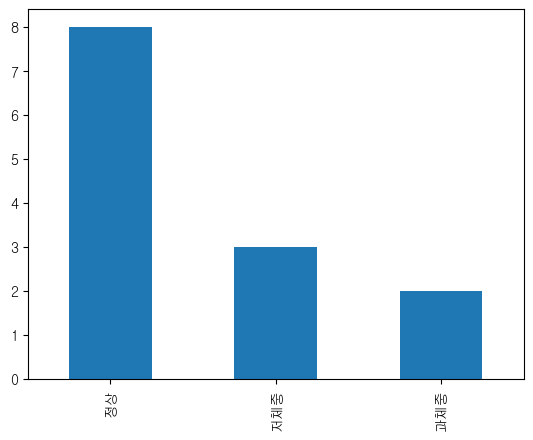

In [35]:
value_count.plot(kind='bar')

In [36]:
print(value_count.index)
print(value_count.values)

Index(['정상', '저체중', '과체중'], dtype='object')
[8 3 2]


<AxesSubplot: xlabel='키', ylabel='몸무게'>

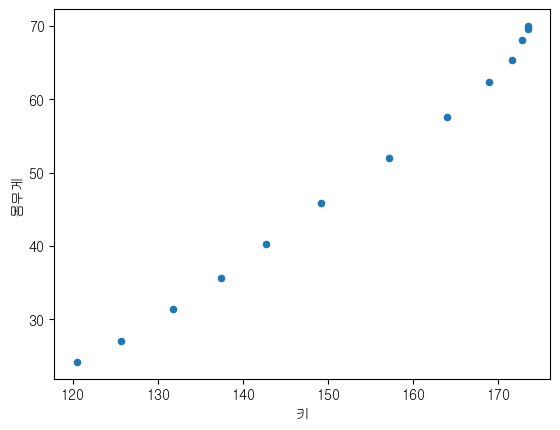

In [38]:
# 남자 여자 키, 몸무게 데이터 가져와서 시각화 하기
# 남자 키, 몸무게 데이터 가져오기
data_male = df_male[['키', '몸무게']]
data_male.plot.scatter(x='키', y='몸무게')


<AxesSubplot: xlabel='키', ylabel='몸무게'>

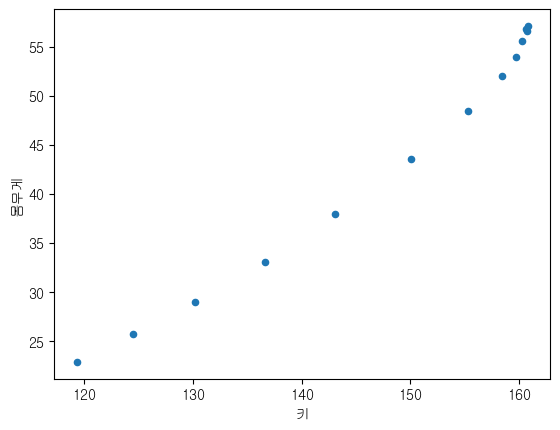

In [39]:
data_female = df_female[['키', '몸무게']]
data_female.plot.scatter(x='키', y='몸무게')

In [40]:
# 시리즈를 넘파이 배열로 변경하기 
male_height = np.array(data_male['키'])
male_weight = np.array(data_male['몸무게'])
female_height = np.array(data_female['키'])
female_weight = np.array(data_female['몸무게'])
print(female_height)

[119.3 124.5 130.2 136.6 143.1 150.1 155.3 158.4 159.7 160.3 160.6 160.8
 160.7]


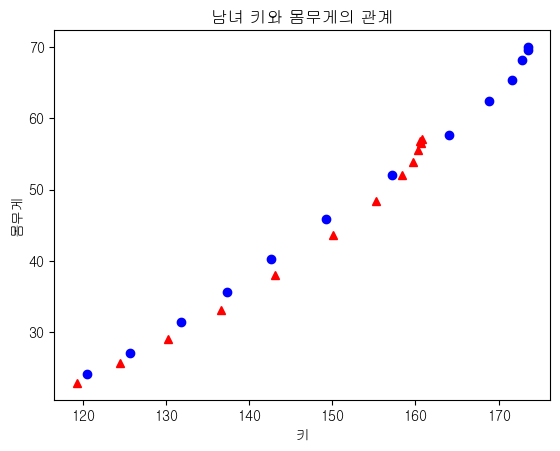

In [41]:
plt.plot(male_height, male_weight, 'o', color='blue')
plt.plot(female_height, female_weight, '^', color='red')
plt.title("남녀 키와 몸무게의 관계")
plt.xlabel("키")
plt.ylabel("몸무게")
plt.show()


### 선형회귀 분석

In [54]:
heights = np.array(data['키'])
heights = heights.reshape(-1, 1)
weights = np.array(data['몸무게'])

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 모델을 생성합니다.
model.fit(X=heights, y=weights) # 모델에 X, y 값들을 적용합니다. fit 함수는 리스트 또는 배열 형태의 X, y 인수들을 필요로 합니다.
weight = model.predict([[175]])
print(weight)

[68.14276696]


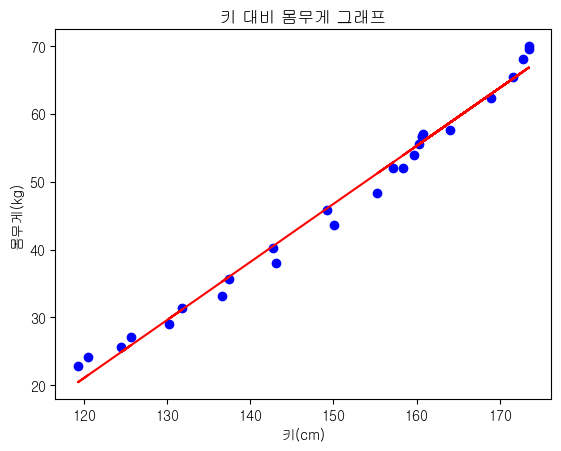

In [64]:
plt.plot(heights, weights, 'o', color='blue')
plt.plot(heights, model.predict(heights), color='r') # 선형 회귀 선을 그립니다.
plt.title('키 대비 몸무게 그래프')
plt.xlabel('키(cm)')
plt.ylabel('몸무게(kg)')
plt.show()

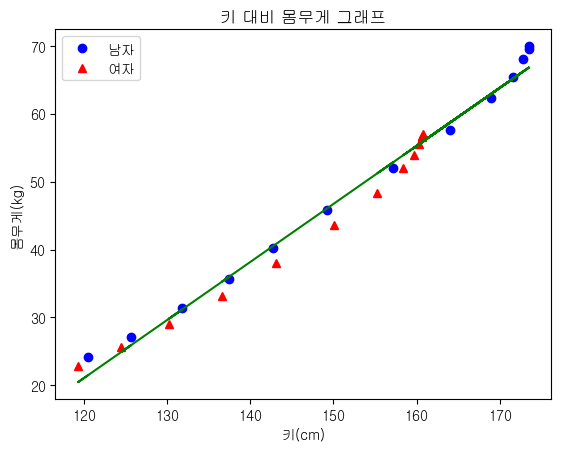

In [66]:
plt.plot(male_height, male_weight, 'o', color='blue', label='남자')
plt.plot(female_height, female_weight, '^', color='red', label='여자')
plt.plot(heights, model.predict(heights), color='g') # 선형 회귀 선을 그립니다.
plt.title('키 대비 몸무게 그래프')
plt.xlabel('키(cm)')
plt.ylabel('몸무게(kg)')
plt.legend()
plt.show()